In [2]:
from sklearn import metrics
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
import sklearn.metrics as metrics 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"/content/collegePlace.csv")
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [4]:
df.shape

(2966, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [6]:
df.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

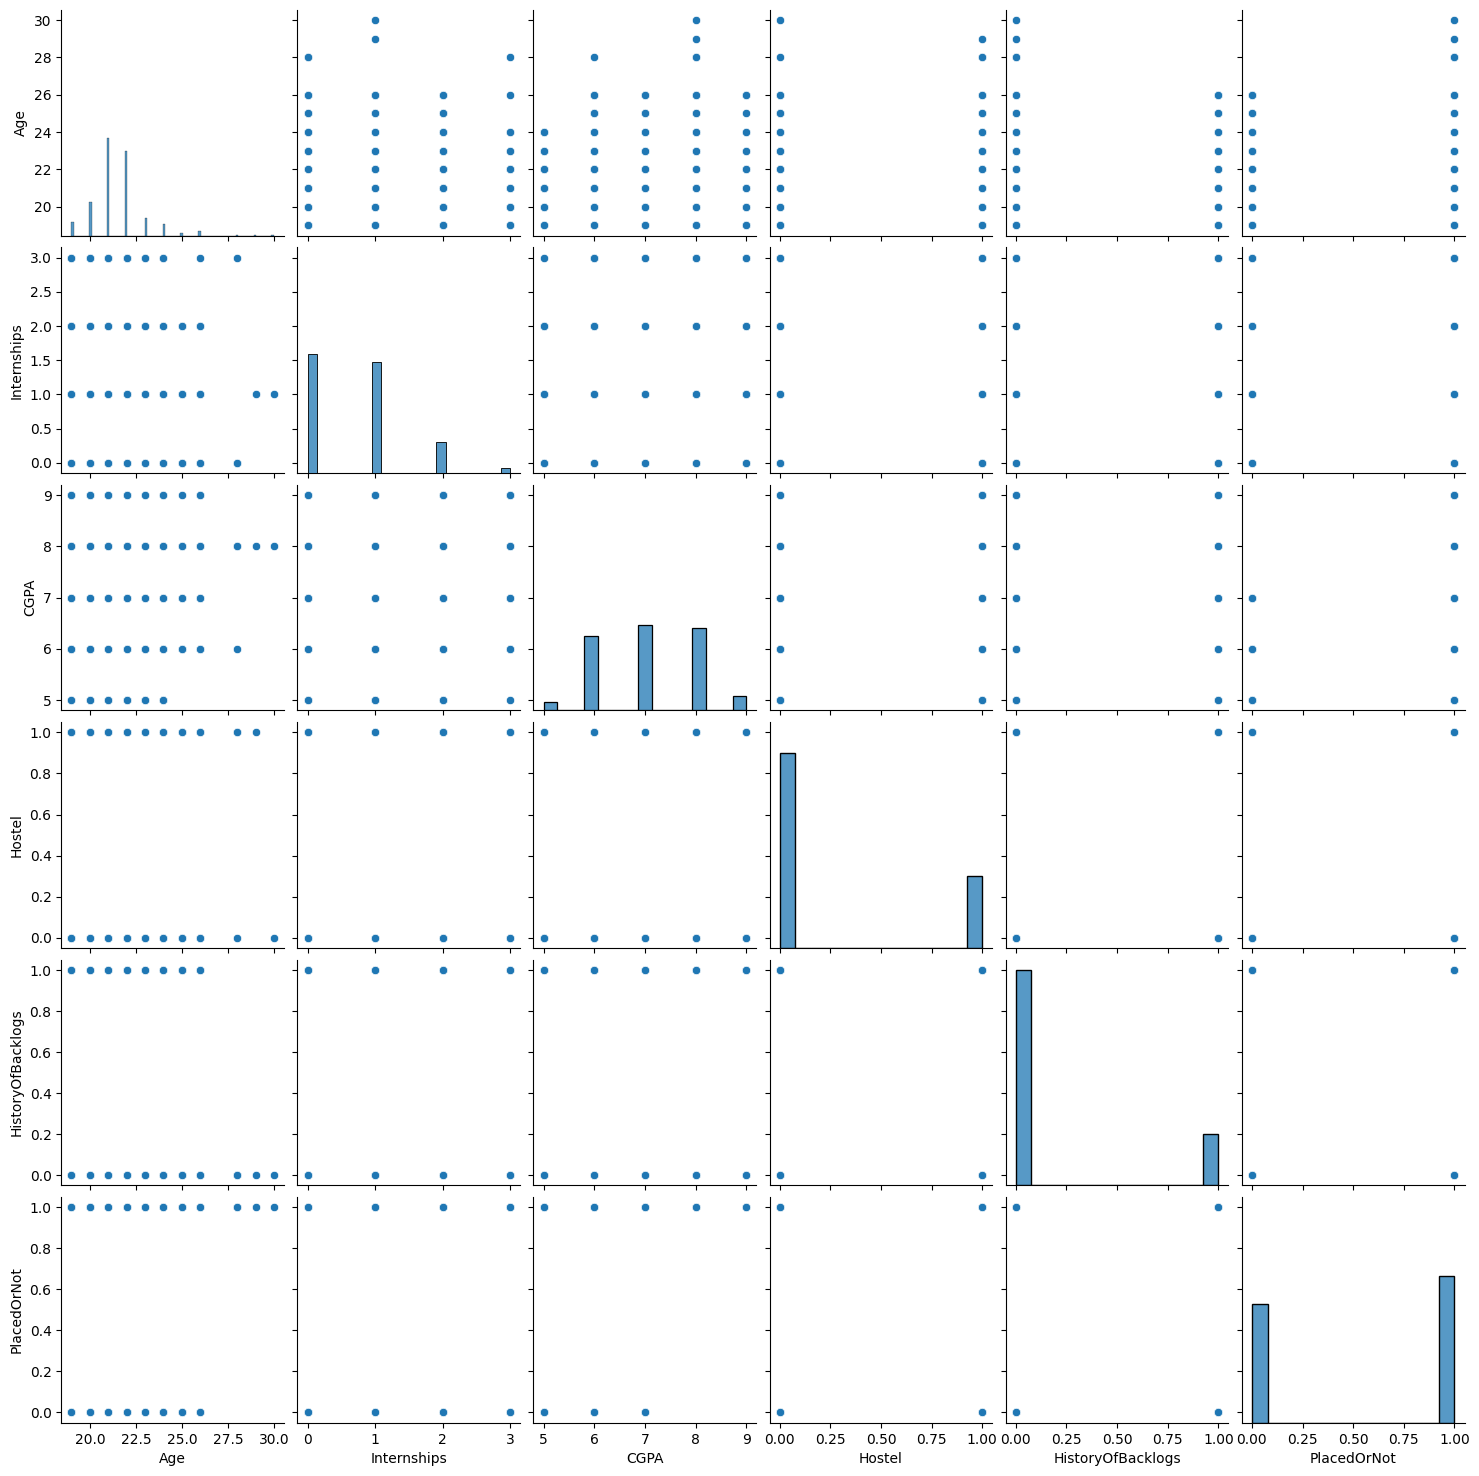

In [7]:
sns.pairplot(df)

In [8]:
corr = df.corr()

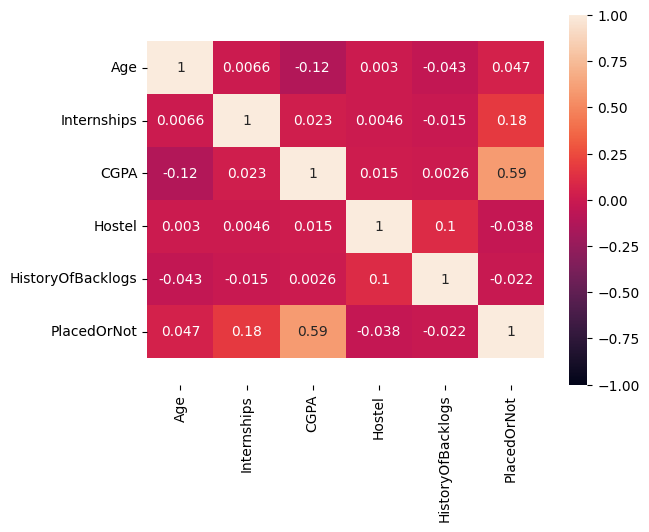

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
Age,1.000000,0.006552,-0.119787,0.003042,-0.042586,0.046943
Internships,0.006552,1.000000,0.023496,0.004617,-0.015118,0.179334
CGPA,-0.119787,0.023496,1.000000,0.014991,0.002576,0.588648
Hostel,0.003042,0.004617,0.014991,1.000000,0.103506,-0.038182
HistoryOfBacklogs,-0.042586,-0.015118,0.002576,0.103506,1.000000,-0.022337
PlacedOrNot,0.046943,0.179334,0.588648,-0.038182,-0.022337,1.000000


In [9]:
ax=sns.heatmap(corr,vmin=-1,vmax=1,annot=True)
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)
plt.show()
corr

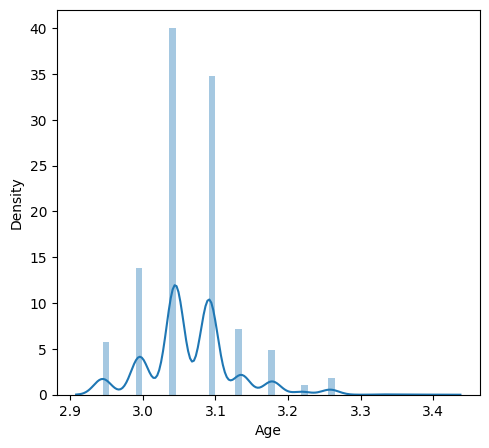

In [10]:
def transformationplot(feature):
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sns.distplot(feature)

transformationplot(np.log(df['Age']))

In [11]:
df = df.replace(['Male'],[0])
df = df.replace(['Female'],[1])


df = df.replace(['computer science'],[0])
df = df.replace(['Computer Science'],[0])
df = df.replace(['Information Technology'],[1])
df = df.replace(['Electronics And Communication'],[2])
df = df.replace(['Mechanical'],[3])
df = df.replace(['Electrical'],[4])
df = df.replace(['Civil'],[5])
df 

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,0,2,1,8,1,1,1
1,21,1,0,0,7,1,1,1
2,22,1,1,1,6,0,0,1
3,21,0,1,0,8,0,1,1
4,22,0,3,0,8,1,0,1
...,...,...,...,...,...,...,...,...
2961,23,0,1,0,7,0,0,0
2962,23,0,3,1,7,1,0,0
2963,22,0,1,1,7,0,0,0
2964,22,0,0,1,7,0,0,0


<Axes: xlabel='CGPA', ylabel='Density'>

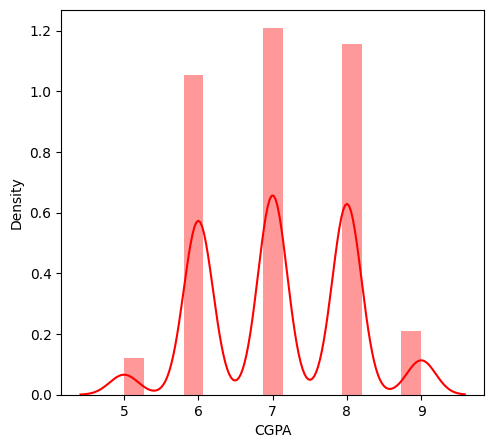

In [12]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(df['CGPA'],color='r')

<Axes: xlabel='PlacedOrNot', ylabel='Density'>

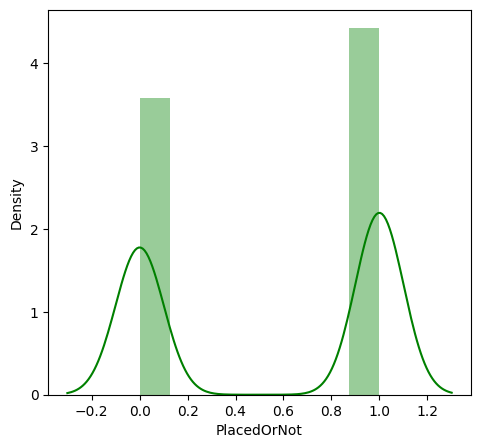

In [13]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(df['PlacedOrNot'],color='g')

In [14]:
df.info

<bound method DataFrame.info of       Age  Gender  Stream  Internships  CGPA  Hostel  HistoryOfBacklogs  \
0      22       0       2            1     8       1                  1   
1      21       1       0            0     7       1                  1   
2      22       1       1            1     6       0                  0   
3      21       0       1            0     8       0                  1   
4      22       0       3            0     8       1                  0   
...   ...     ...     ...          ...   ...     ...                ...   
2961   23       0       1            0     7       0                  0   
2962   23       0       3            1     7       1                  0   
2963   22       0       1            1     7       0                  0   
2964   22       0       0            1     7       0                  0   
2965   23       0       5            0     8       0                  0   

      PlacedOrNot  
0               1  
1               1  
2      

<Axes: xlabel='CGPA', ylabel='Density'>

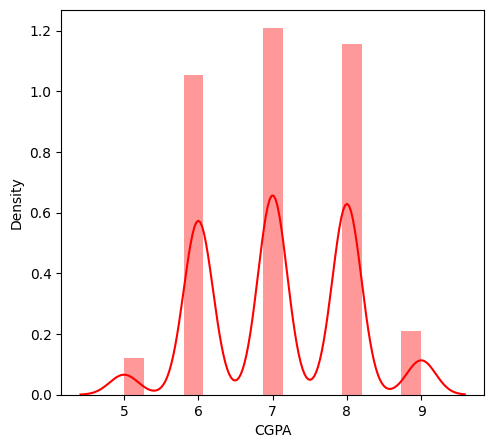

In [15]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(df['CGPA'],color='r')

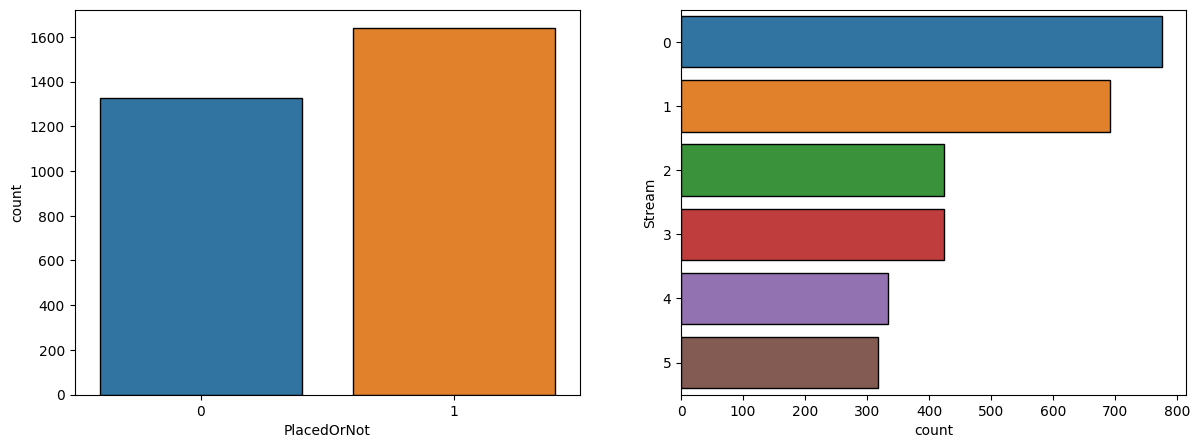

In [16]:
from matplotlib.offsetbox import martist
plt.figure(figsize=(30,5))
plt.subplot(1,4,1)
sns.countplot(x="PlacedOrNot",data=df, ec='black')
plt.subplot(1,4,2)
sns.countplot(y="Stream",data=df, ec='black')
plt.show()

<Axes: xlabel='PlacedOrNot', ylabel='count'>

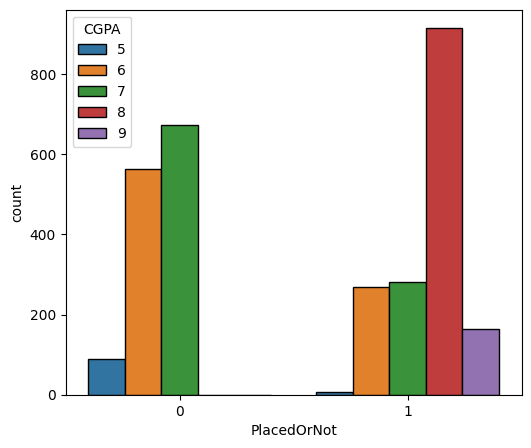

In [17]:
plt.figure(figsize=(20,5))
plt.subplot(131)
sns.countplot(x="PlacedOrNot", data=df, hue='CGPA' , ec='black')

In [18]:
#sns.swarmplot(x='PlacedOrNot',y='CGPA', hue='Stream', data=df)


In [19]:
df.describe()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
count,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000
mean,21.485840,0.165543,1.932569,0.703641,7.073837,0.269049,0.192178,0.552596
std,1.324933,0.371732,1.682618,0.740197,0.967748,0.443540,0.394079,0.497310
min,19.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000
50%,21.000000,0.000000,2.000000,1.000000,7.000000,0.000000,0.000000,1.000000
75%,22.000000,0.000000,3.000000,1.000000,8.000000,1.000000,0.000000,1.000000
max,30.000000,1.000000,5.000000,3.000000,9.000000,1.000000,1.000000,1.000000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Age                2966 non-null   int64
 1   Gender             2966 non-null   int64
 2   Stream             2966 non-null   int64
 3   Internships        2966 non-null   int64
 4   CGPA               2966 non-null   int64
 5   Hostel             2966 non-null   int64
 6   HistoryOfBacklogs  2966 non-null   int64
 7   PlacedOrNot        2966 non-null   int64
dtypes: int64(8)
memory usage: 185.5 KB


In [21]:
df['Gender'].value_counts()

0    2475
1     491
Name: Gender, dtype: int64

In [22]:
df=df.drop(['Hostel'], axis=1)

In [23]:
x=df.drop('PlacedOrNot',axis=1)
y=df['PlacedOrNot']
import joblib
joblib.dump(x,"placement")
print(x)
print(y)

      Age  Gender  Stream  Internships  CGPA  HistoryOfBacklogs
0      22       0       2            1     8                  1
1      21       1       0            0     7                  1
2      22       1       1            1     6                  0
3      21       0       1            0     8                  1
4      22       0       3            0     8                  0
...   ...     ...     ...          ...   ...                ...
2961   23       0       1            0     7                  0
2962   23       0       3            1     7                  0
2963   22       0       1            1     7                  0
2964   22       0       0            1     7                  0
2965   23       0       5            0     8                  0

[2966 rows x 6 columns]
0       1
1       1
2       1
3       1
4       1
       ..
2961    0
2962    0
2963    0
2964    0
2965    1
Name: PlacedOrNot, Length: 2966, dtype: int64


In [24]:
sc=StandardScaler()

In [25]:
print(sc)
sc.fit(x)

StandardScaler()


StandardScaler()

In [26]:
sd=sc.transform(x)
#x=sc.fit_transform()
#x = pd.DataFrame(x)
print(sd)

[[ 0.38813058 -0.44540301  0.04008175  0.40044544  0.95719068  2.05024603]
 [-0.36675158  2.24515772 -1.14874288 -0.95077319 -0.07631043  2.05024603]
 [ 0.38813058  2.24515772 -0.55433057  0.40044544 -1.10981154 -0.48774634]
 ...
 [ 0.38813058 -0.44540301 -0.55433057  0.40044544 -0.07631043 -0.48774634]
 [ 0.38813058 -0.44540301 -1.14874288  0.40044544 -0.07631043 -0.48774634]
 [ 1.14301273 -0.44540301  1.82331869 -0.95077319  0.95719068 -0.48774634]]


In [27]:
x=sd
y=df['PlacedOrNot']


In [28]:
y

0       1
1       1
2       1
3       1
4       1
       ..
2961    0
2962    0
2963    0
2964    0
2965    1
Name: PlacedOrNot, Length: 2966, dtype: int64

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, stratify=y, random_state=2)

In [30]:
print(x.shape,x_train.shape,x_test.shape)

(2966, 6) (2372, 6) (594, 6)


In [31]:
classifier =svm.SVC(kernel='linear')
classifier.fit(x_train,y_train)
svm.SVC(kernel='linear')
X_train_prediction=classifier.predict(x_train)
training_data_accuracy=accuracy_score(X_train_prediction,y_train)

print('Accuracy score of the training data:', training_data_accuracy)

Accuracy score of the training data: 0.7685497470489039


In [32]:
x_train

array([[ 1.89789488, -0.44540301,  1.82331869,  0.40044544, -1.10981154,
        -0.48774634],
       [-1.12163373, -0.44540301, -0.55433057,  0.40044544, -0.07631043,
        -0.48774634],
       [-0.36675158, -0.44540301, -0.55433057,  0.40044544, -0.07631043,
        -0.48774634],
       ...,
       [-1.12163373, -0.44540301, -1.14874288,  1.75166407, -0.07631043,
        -0.48774634],
       [ 0.38813058, -0.44540301, -0.55433057,  0.40044544,  1.99069179,
        -0.48774634],
       [ 1.89789488, -0.44540301, -1.14874288,  0.40044544, -1.10981154,
         2.05024603]])

In [33]:
best_k={"Regular":0}
best_score={"Regular":0}
for k in range(3, 50, 2):
  knn_temp=KNeighborsClassifier(n_neighbors=k)
  knn_temp.fit(x_train, y_train)
  knn_temp_pred=knn_temp.predict(x_test)
  score=metrics.accuracy_score(y_test, knn_temp_pred)*100
  if score >=best_score["Regular"]and score<100:
    best_score["Regular"]=score
    best_k["Regular"] = k


    

In [34]:
print("---Results---\nK: {}\n Score:{}".format(best_k, best_score))
knn = KNeighborsClassifier(n_neighbors=best_k["Regular"])
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)
testd = accuracy_score(knn_pred, y_test)

---Results---
K: {'Regular': 7}
 Score:{'Regular': 86.19528619528619}


In [35]:
knn_pred

array([1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [36]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras import layers


In [37]:
classifier = Sequential()

#add input layer and first hidden layer
classifier.add(keras.layers.Dense(6,activation = 'relu',input_dim = 6))
classifier.add(keras.layers.Dropout(0.50))

#add second hidden layer
classifier.add(keras.layers.Dense(6,activation = 'relu'))
classifier.add(keras.layers.Dropout(0.50))

#final or output layer
classifier.add(keras.layers.Dense(1,activation = 'sigmoid'))




In [38]:
#compiling the moddel
loss_1 = tf. keras.losses.BinaryCrossentropy()
classifier.compile(optimizer='Adam',loss=loss_1,metrics=['accuracy'])

In [39]:
classifier.fit(x_train, y_train, batch_size = 20, epochs = 100)

Epoch 1/100
119/119 [==============================] - 1s 2ms/step - loss: 0.8240 - accuracy: 0.4279
Epoch 2/100
119/119 [==============================] - 0s 2ms/step - loss: 0.7298 - accuracy: 0.4823
Epoch 3/100
119/119 [==============================] - 0s 2ms/step - loss: 0.6869 - accuracy: 0.5177
Epoch 4/100
119/119 [==============================] - 0s 2ms/step - loss: 0.6620 - accuracy: 0.5843
Epoch 5/100
119/119 [==============================] - 0s 2ms/step - loss: 0.6401 - accuracy: 0.5987
Epoch 6/100
119/119 [==============================] - 0s 2ms/step - loss: 0.6278 - accuracy: 0.6151
Epoch 7/100
119/119 [==============================] - 0s 2ms/step - loss: 0.6163 - accuracy: 0.6121
Epoch 8/100
119/119 [==============================] - 0s 2ms/step - loss: 0.5966 - accuracy: 0.6336
Epoch 9/100
119/119 [==============================] - 0s 2ms/step - loss: 0.5894 - accuracy: 0.6269
Epoch 10/100
119/119 [==============================] - 0s 2ms/step - loss: 0.5717 - accura

In [40]:
pred=classifier.predict(x_test)
pred= (pred>0.5)
pred

19/19 [==============================] - 0s 2ms/step


array([[ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [

In [41]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, pred)
cm

array([[265,   1],
       [102, 226]])

In [42]:
import pickle
pickle.dump(knn,open("placement.pkl",'wb'))
model = pickle.load(open('placement.pkl','rb'))

In [43]:
input_data=[[22,0,2,1,8,1]]
prediction=knn.predict(input_data)
print(prediction)
if(prediction[0]==0):
  print('Not placed')
else:
  print('placed')

[1]
placed


In [44]:
input_data=[[23,0,1,0,7,0]]
prediction=knn.predict(input_data)
print(prediction)
if(prediction[0]==0):
  print('Not placed')
else:
  print('placed')

[1]
placed
